# K_means_&_Hierarchical_Clustering

This case requires developing a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit cardholders during the last 6 months. The file is at a customer level with 18 behavioral variables.

# 1. Loading the dataset

In [1]:
# First of all, we need to import the Python pandas library
import pandas as pd

In [2]:
# We read the dataset through the read_csv() function
data = pd.read_csv("CC GENERAL.csv")
data.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

### General information

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

This dataset has 8950 examples and 18 columns. 3 of the columns are integers, 14 are floats and 1 is an object.

Columns descriptions :

- **CUST_ID**: Identification of credit cardholder (Categorical)

- **BALANCE**: Balance amount left in their account to make purchases (BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)) 

- **PURCHASES**: Amount of purchases made from the account

- **ONEOFF_PURCHASES**: Maximum purchase amount done in once

- **INSTALLMENTS_PURCHASES**: Amount of purchase done in installments

- **CASH_ADVANCE**: Cash in advance given by the user

- **PURCHASES_FREQUENCY**: How frequently the purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

- **ONEOFFPURCHASESFREQUENCY**: How frequently purchases are happening at once (1 = frequently purchased, 0 = not frequently purchased)

- **PURCHASESINSTALLMENTSFREQUENCY**: How frequently purchases in installments are being made (1 = frequently done, 0 = not frequently done)

- **CASHADVANCEFREQUENCY**: How frequently the cash in advance is being paid 

- **CASHADVANCETRX**: Number of transactions made with "Cash in Advance" PURCHASES_TRX: Number of purchase transactions made

- **CREDIT_LIMIT**: Limit of credit card for user 

- **PAYMENTS**: Amount of payment done by userMINIMUM_PAYMENTS: Minimum amount of payments made by user PRCFULLPAYMENT: Percent of full payment paid by userTENURE: Tenure of credit card service for user

In [4]:
# Descriptive statistics about the data
data.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

### Find missing information

In [5]:
# Counting missing values per variable (Feature)
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
# Counting all the missing values
data.isnull().sum().sum()

314

In [7]:
# Representing missing values by percentages
total = data.isnull().sum().sort_values(ascending = False)
percent1 = data.isnull().sum()/data.isnull().count()*100
percent2 = (round(percent1, 1)).sort_values(ascending = False)
missing_data = pd.concat([total, percent2], axis = 1, keys = ['Total', '%'])
missing_data

Total    %
MINIMUM_PAYMENTS                    313  3.5
CREDIT_LIMIT                          1  0.0
CUST_ID                               0  0.0
BALANCE                               0  0.0
PRC_FULL_PAYMENT                      0  0.0
PAYMENTS                              0  0.0
PURCHASES_TRX                         0  0.0
CASH_ADVANCE_TRX                      0  0.0
CASH_ADVANCE_FREQUENCY                0  0.0
PURCHASES_INSTALLMENTS_FREQUENCY      0  0.0
ONEOFF_PURCHASES_FREQUENCY            0  0.0
PURCHASES_FREQUENCY                   0  0.0
CASH_ADVANCE                          0  0.0
INSTALLMENTS_PURCHASES                0  0.0
ONEOFF_PURCHASES                      0  0.0
PURCHASES                             0  0.0
BALANCE_FREQUENCY                     0  0.0
TENURE                                0  0.0

Columns with missing values : MINIMUM_PAYMENTS, CREDIT_LIMIT

- The "CREDIT_LIMIT" column has only 1 missing value, which can easily be filled my the mean.
- The "MINIMUM_PAYMENTS" column has 313 missing values. We can replace them by the mean.

### Replace missing values

In [8]:
data["CREDIT_LIMIT"].value_counts()

3000.000000     784
1500.000000     722
1200.000000     621
1000.000000     614
2500.000000     612
               ... 
9200.000000       1
13550.000000      1
7227.272727       1
11250.000000      1
1833.333333       1
Name: CREDIT_LIMIT, Length: 205, dtype: int64

In [9]:
data["CREDIT_LIMIT"].mean()

4494.449450364621

In [10]:
data["MINIMUM_PAYMENTS"].value_counts()

299.351881    2
342.286490    1
184.464721    1
276.486072    1
309.140865    1
             ..
181.773223    1
711.894455    1
256.522546    1
127.799107    1
88.288956     1
Name: MINIMUM_PAYMENTS, Length: 8636, dtype: int64

In [11]:
data["MINIMUM_PAYMENTS"].mean()

864.2065423050828

In [12]:
# Replacing the missing values in the "CREDIT_LIMIT" column with the mean
data["CREDIT_LIMIT"].fillna(data["CREDIT_LIMIT"].mean(), inplace = True)

In [13]:
# Replacing the missing values in the "MINIMUM_PAYMENTS" column with the mean
data["MINIMUM_PAYMENTS"].fillna(data["MINIMUM_PAYMENTS"].mean(), inplace = True)

In [14]:
# Checking
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

### Checking the existence of duplicated rows

In [16]:
data.duplicated().sum()

0

### Droping useless features

In [17]:
data.drop("CUST_ID", axis = 1, inplace = True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

# 2. Using hierarchical clustering

We try to identify the inherent groupings within the data

In [19]:
#Importing our clustering algorithm : Agglomerative

from sklearn.cluster import AgglomerativeClustering

In [20]:
#Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric

model = AgglomerativeClustering(n_clusters = 5,
                                affinity = 'euclidean',
                                linkage = 'complete')

clust_labels = model.fit_predict(data)

In [21]:
agglomerative = pd.DataFrame(clust_labels)
agglomerative

0
0     0
1     0
2     0
3     0
4     0
...  ..
8945  0
8946  0
8947  0
8948  0
8949  0

[8950 rows x 1 columns]

In [22]:
agglomerative.value_counts()

0    8920
2      20
1       7
4       2
3       1
dtype: int64

# 3. Ploting the clusters

In [23]:
import matplotlib.pyplot as plt

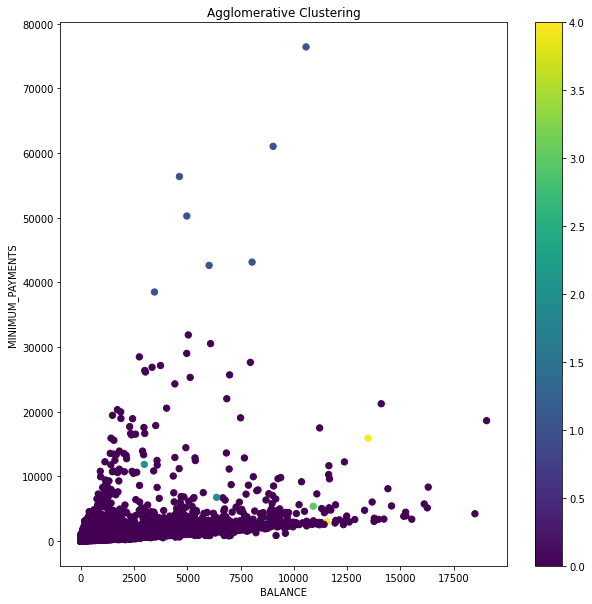

In [24]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(data['BALANCE'] , data["MINIMUM_PAYMENTS"] , c = agglomerative[0], s = 40)
ax.set_title("Agglomerative Clustering")
ax.set_xlabel("BALANCE")
ax.set_ylabel("MINIMUM_PAYMENTS")
plt.colorbar(scatter)

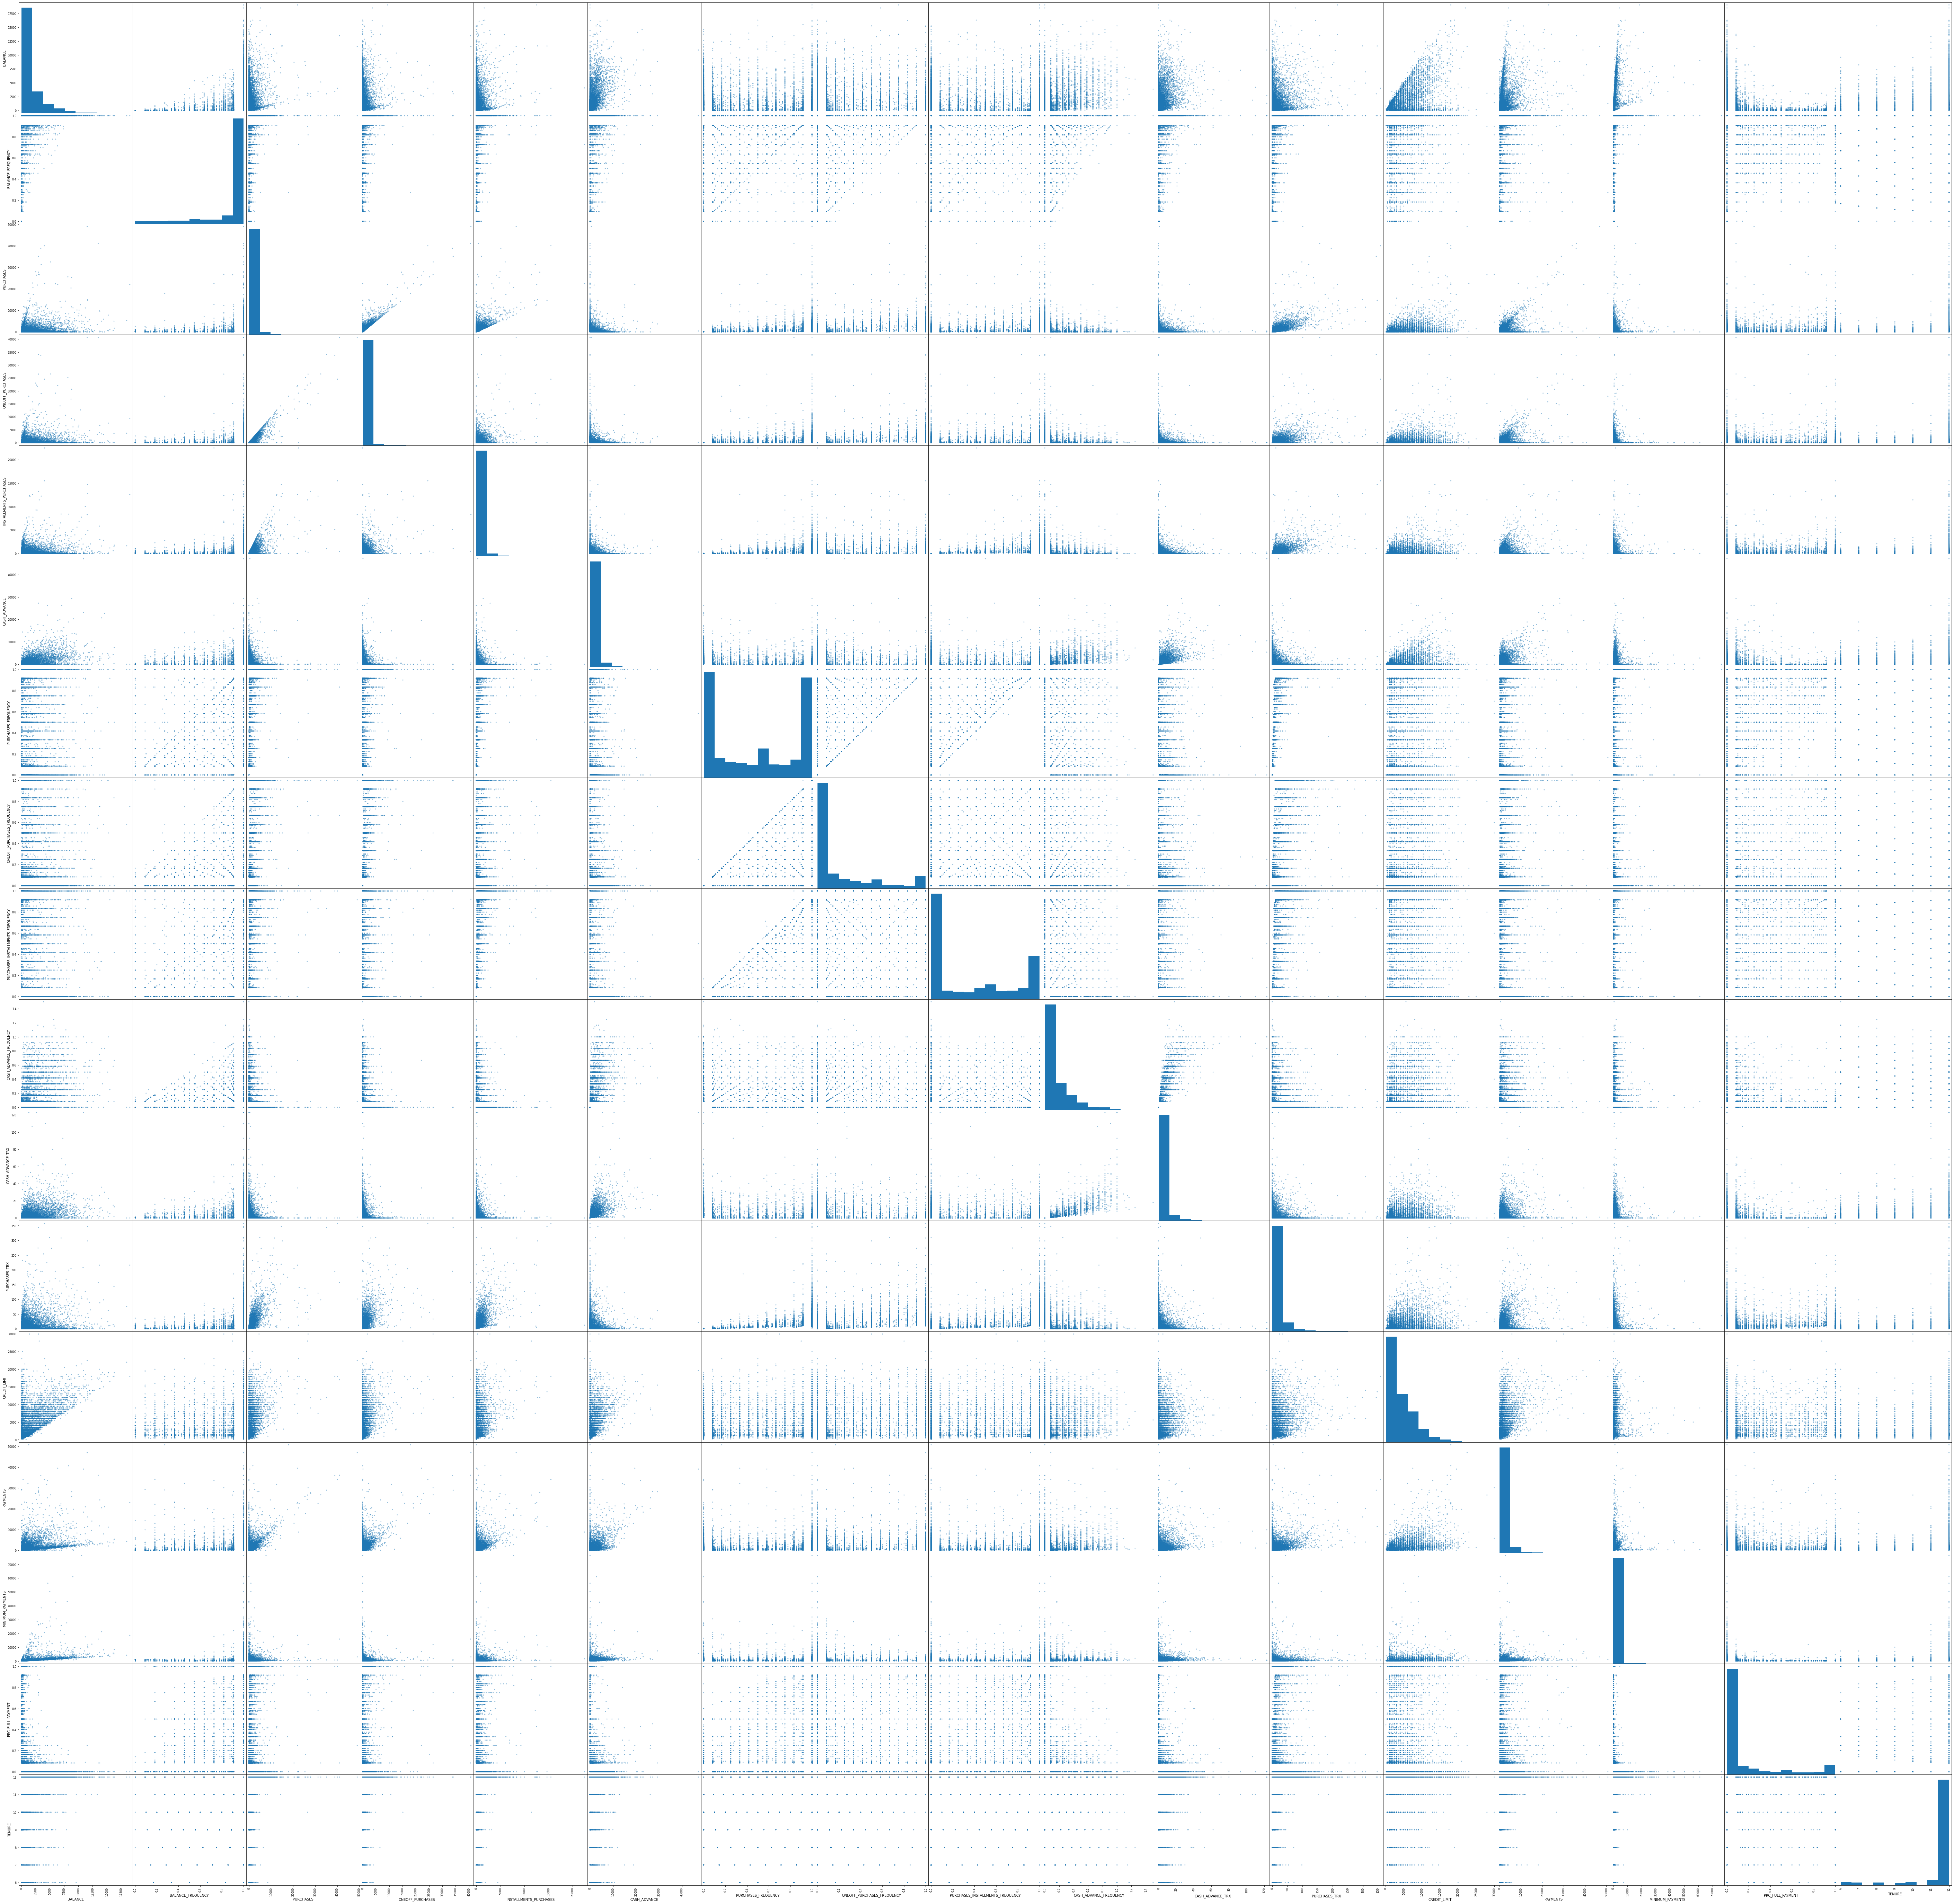

In [25]:
pd.plotting.scatter_matrix(data, figsize = (100,100))
plt.show()

# 4.1 Ploting the dendrogram

In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage

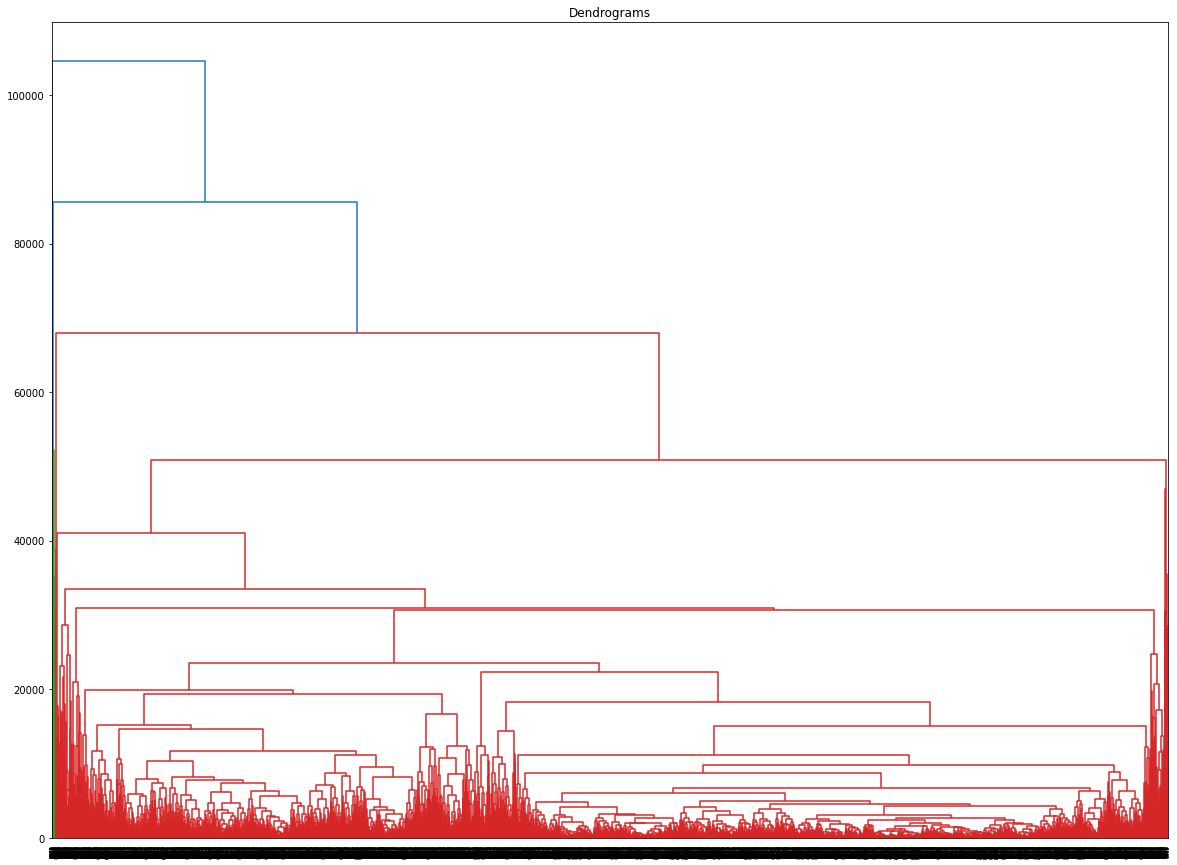

In [27]:
plt.figure(figsize = (20,15))
plt.title("Dendrograms")
dend = dendrogram(linkage(data, method = "complete"))

# 4.2 Using K-means clustering

In [28]:
from sklearn.cluster import KMeans
import pandas as pd

In [29]:
kmeans =  KMeans(n_clusters = 5, random_state = 123)

kmeans.fit(data)

KMeans(n_clusters=5, random_state=123)

In [30]:
pd.Series(kmeans.labels_).value_counts()

0    5603
4    2579
1     687
3      56
2      25
dtype: int64

# 5. Trying different K values and selecting the best one

In [31]:
Sum_of_squared_distances = []
K = range(2,30)
for k in K:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(data)
    Sum_of_squared_distances.append(kmeans.inertia_)

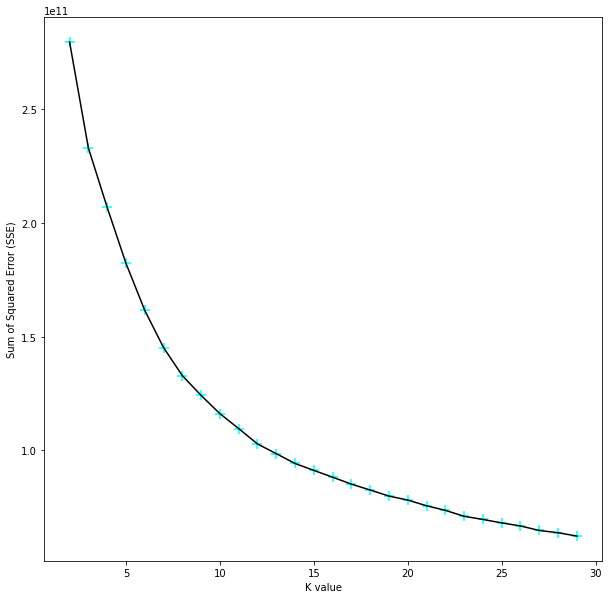

In [32]:
fig = plt.figure(figsize = (10,10))
plt.plot(K, Sum_of_squared_distances, c = "black")
plt.scatter(K, Sum_of_squared_distances, s = 120, marker = "+", c = "cyan")
plt.xlabel("K value")
plt.ylabel("Sum of Squared Error (SSE)")
plt.show()

The best k value is **8**.

# 6. Ploting the clusters

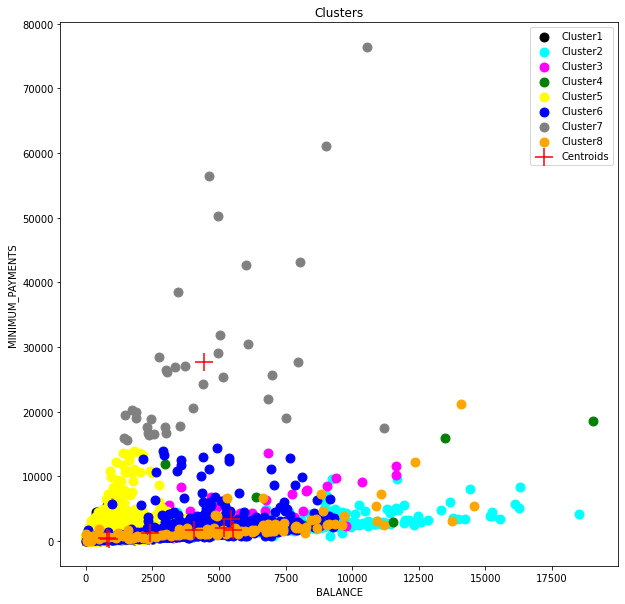

In [33]:
# K_means clustering based on all features
kmeans =  KMeans(n_clusters = 8, random_state = 123)
kmeans.fit(data)

# Scatter plot to vizualise 
fig = plt.figure(figsize = (10,10))
plt.scatter(data['BALANCE'][kmeans.labels_ == 0], data["MINIMUM_PAYMENTS"][kmeans.labels_ == 0], s = 80, c = 'black', label='Cluster1')
plt.scatter(data['BALANCE'][kmeans.labels_ == 1], data["MINIMUM_PAYMENTS"][kmeans.labels_ == 1], s = 80, c = 'cyan', label='Cluster2')
plt.scatter(data['BALANCE'][kmeans.labels_ == 2], data["MINIMUM_PAYMENTS"][kmeans.labels_ == 2], s = 80, c = 'magenta', label='Cluster3')
plt.scatter(data['BALANCE'][kmeans.labels_ == 3], data["MINIMUM_PAYMENTS"][kmeans.labels_ == 3], s = 80, c = 'green', label='Cluster4')
plt.scatter(data['BALANCE'][kmeans.labels_ == 4], data["MINIMUM_PAYMENTS"][kmeans.labels_ == 4], s = 80, c = 'yellow', label='Cluster5')
plt.scatter(data['BALANCE'][kmeans.labels_ == 5], data["MINIMUM_PAYMENTS"][kmeans.labels_ == 5], s = 80, c = 'blue', label='Cluster6')
plt.scatter(data['BALANCE'][kmeans.labels_ == 6], data["MINIMUM_PAYMENTS"][kmeans.labels_ == 6], s = 80, c = 'grey', label='Cluster7')
plt.scatter(data['BALANCE'][kmeans.labels_ == 7], data["MINIMUM_PAYMENTS"][kmeans.labels_ == 7], s = 80, c = 'orange', label='Cluster8')



plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 14], marker='+',s = 300, c = 'red', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('BALANCE')
plt.ylabel('MINIMUM_PAYMENTS')
plt.legend()
plt.show()

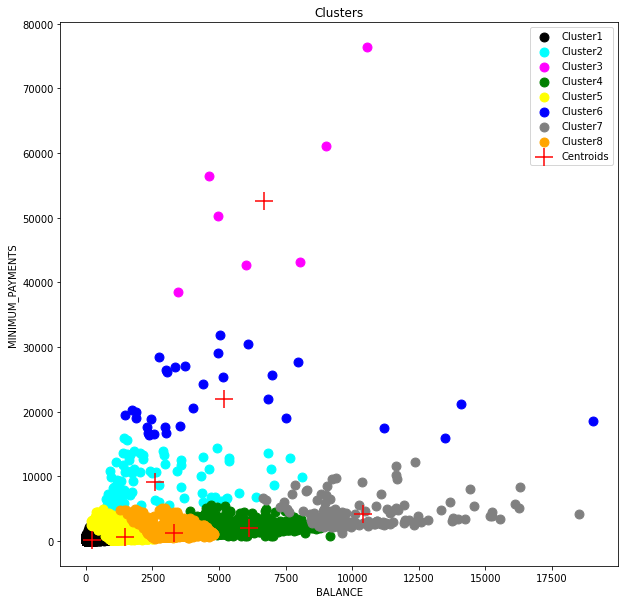

In [34]:
# K_means clustering based on 2 features
kmeans =  KMeans(n_clusters = 8, random_state = 123)
kmeans.fit(data[['BALANCE','MINIMUM_PAYMENTS']])

# Scatter plot to vizualise 
fig = plt.figure(figsize = (10,10))
plt.scatter(data['BALANCE'][kmeans.labels_ == 0], data["MINIMUM_PAYMENTS"][kmeans.labels_ == 0], s = 80, c = 'black', label='Cluster1')
plt.scatter(data['BALANCE'][kmeans.labels_ == 1], data["MINIMUM_PAYMENTS"][kmeans.labels_ == 1], s = 80, c = 'cyan', label='Cluster2')
plt.scatter(data['BALANCE'][kmeans.labels_ == 2], data["MINIMUM_PAYMENTS"][kmeans.labels_ == 2], s = 80, c = 'magenta', label='Cluster3')
plt.scatter(data['BALANCE'][kmeans.labels_ == 3], data["MINIMUM_PAYMENTS"][kmeans.labels_ == 3], s = 80, c = 'green', label='Cluster4')
plt.scatter(data['BALANCE'][kmeans.labels_ == 4], data["MINIMUM_PAYMENTS"][kmeans.labels_ == 4], s = 80, c = 'yellow', label='Cluster5')
plt.scatter(data['BALANCE'][kmeans.labels_ == 5], data["MINIMUM_PAYMENTS"][kmeans.labels_ == 5], s = 80, c = 'blue', label='Cluster6')
plt.scatter(data['BALANCE'][kmeans.labels_ == 6], data["MINIMUM_PAYMENTS"][kmeans.labels_ == 6], s = 80, c = 'grey', label='Cluster7')
plt.scatter(data['BALANCE'][kmeans.labels_ == 7], data["MINIMUM_PAYMENTS"][kmeans.labels_ == 7], s = 80, c = 'orange', label='Cluster8')



plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='+',s = 300, c = 'red', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('BALANCE')
plt.ylabel('MINIMUM_PAYMENTS')
plt.legend()
plt.show()

# 7. Comparing the two results

Kmeans (Non Hierarchical) clustering is more efficient than Hierarchical clustering (In this case, agglomerative clustering).

The agglomerative clustering is sensitive to outliers.

Non hierachical Clustering (in this case, kmeans) is comparatively more faster than Hierarchical Clustering.